In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
import matplotlib as mpl
from sklearn.model_selection import train_test_split
mpl.rcParams.update({'font.size': 15})

In [2]:
DATA = pd.read_excel('PTResults-1000.xlsx') # big dataset

param = DATA.iloc[:,1:6].to_numpy() # features
data = DATA.iloc[:, 6:].to_numpy()  # labels

nRand = 10                    # number of shuffles
panels = DATA.iloc[4,6:].size # number of cells
nK = 6                        # number of NN algorithms tried (NN1, NN3, NN5, NN7, NN9, NN11)

rand_seed = np.random.randint(1, high=100000, size=nRand)

# variable to store the number of wrong predictions for each panel and each 
# NN algorithm (used to compute standard deviation)
str = np.empty([panels,nRand,nK])


# accumulation variable for error on each panel
errPanel = np.empty([panels,nK])
for i in range(panels):
    for j in range(nK):
        errPanel[i,j] = 0

# initialization of the classifiers
NN1  = KNeighborsClassifier(n_neighbors=1)
NN3  = KNeighborsClassifier(n_neighbors=3)
NN5  = KNeighborsClassifier(n_neighbors=5)
NN7  = KNeighborsClassifier(n_neighbors=7)
NN9  = KNeighborsClassifier(n_neighbors=9)
NN11 = KNeighborsClassifier(n_neighbors=11)


counter = 0   # counts data shuffles
for rs in rand_seed:

    counter = counter+1

    # split the data samples randomly between training and testing (85/15)
    np.random.seed(rs)
    train_data, test_data, train_param, test_param = train_test_split(data, param, test_size=0.15, random_state=rs)
    nTest  = test_data[:,1].size     # number of testing samples

    
    print("Run #",counter)
    
    # variable storing predicted labels for each NN algorithm
    pred = np.empty([nK,nTest])

    # training classifiers for each cell
    for p in range(panels):

        dTrain = train_data[:,p]  # training data
        dTest  = test_data[:,p]   # test data

        NN1.fit(train_param,dTrain)
        pred[0,:] = NN1.predict(test_param)

        NN3.fit(train_param,dTrain)
        pred[1,:] = NN3.predict(test_param)

        NN5.fit(train_param,dTrain)
        pred[2,:] = NN5.predict(test_param)

        NN7.fit(train_param,dTrain)
        pred[3,:] = NN7.predict(test_param)

        NN9.fit(train_param,dTrain)
        pred[4,:] = NN9.predict(test_param)

        NN11.fit(train_param,dTrain)
        pred[5,:] = NN11.predict(test_param)

        for i in range(nK):
            # storing (normalized) number of wrong predictions 
            str[p,counter-1,i] = (abs(pred[i,:] - dTest).sum()  / nTest)
            # accumulating errors in variable errPanel
            errPanel[p,i] = errPanel[p,i] + (abs(pred[i,:] - dTest).sum()  / nTest)


print("\n\n")

std = np.empty([panels,nK]) # standard deviation
for i in range(panels):
    # computing error standard deviation at each panel
    for j in range(nK):
        std[i,j] = np.sqrt((1/counter)*((str[i,:,j]-errPanel[i,j]/counter)  * (str[i,:,j]-errPanel[i,j]/counter)).sum())
    
errPanel = errPanel / counter * 100
std = std * 100

# reading header of xlsx file to get curvilinear cooridnates
CC = pd.read_excel('PTResults-1000.xlsx', header=None)
curv =  CC.iloc[0, 6:].to_numpy()
curv = np.array(curv,dtype=float) # matplotlib.pyplot.fill_between won't work w/o this line 

Run # 1
Run # 2
Run # 3
Run # 4
Run # 5
Run # 6
Run # 7
Run # 8
Run # 9
Run # 10





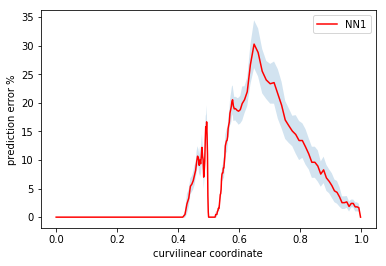

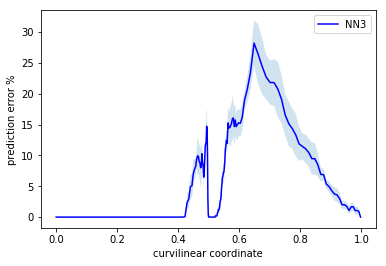

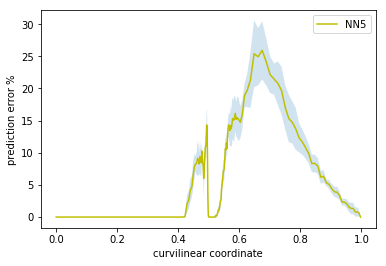

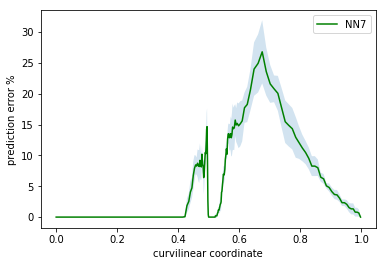

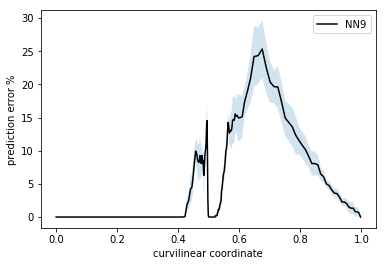

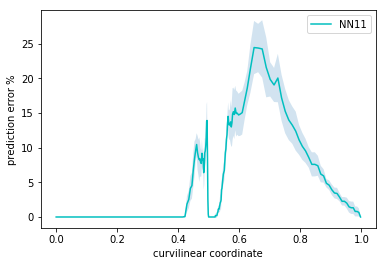

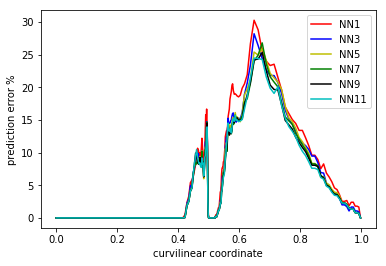

In [3]:
# plotting one figure for each NN algorithm
# x axis curvilinear coordinates
# y axis percentage of missed predictions averaged on all shuffles. Shaded area is standard deviation
plt.figure()
plt.plot(curv,errPanel[:,0],label='NN1',c='r')  # error
plt.fill_between(curv, errPanel[:,0]-std[:,0], errPanel[:,0]+std[:,0],  # fills area according to standard deviation
    alpha=0.2)
plt.legend(loc='upper right')
plt.xlabel('curvilinear coordinate')
plt.ylabel('prediction error %')

plt.figure()
plt.plot(curv,errPanel[:,1],label='NN3',c='b')
plt.fill_between(curv, errPanel[:,1]-std[:,1], errPanel[:,1]+std[:,1],
    alpha=0.2)
plt.legend(loc='upper right')
plt.xlabel('curvilinear coordinate')
plt.ylabel('prediction error %')

plt.figure()
plt.plot(curv,errPanel[:,2],label='NN5',c='y')
plt.fill_between(curv, errPanel[:,2]-std[:,2], errPanel[:,2]+std[:,2],
    alpha=0.2)
plt.legend(loc='upper right')
plt.xlabel('curvilinear coordinate')
plt.ylabel('prediction error %')

plt.figure()
plt.plot(curv,errPanel[:,3],label='NN7',c='g')
plt.fill_between(curv, errPanel[:,3]-std[:,3], errPanel[:,3]+std[:,3],
    alpha=0.2)
plt.legend(loc='upper right')
plt.xlabel('curvilinear coordinate')
plt.ylabel('prediction error %')

plt.figure()
plt.plot(curv,errPanel[:,4],label='NN9',c='k')
plt.fill_between(curv, errPanel[:,4]-std[:,4], errPanel[:,4]+std[:,4],
    alpha=0.2)
plt.legend(loc='upper right')
plt.xlabel('curvilinear coordinate')
plt.ylabel('prediction error %')

plt.figure()
plt.plot(curv,errPanel[:,5],label='NN11',c='c')
plt.fill_between(curv, errPanel[:,5]-std[:,5], errPanel[:,5]+std[:,5],
    alpha=0.2)
plt.legend(loc='upper right')
plt.xlabel('curvilinear coordinate')
plt.ylabel('prediction error %')

# plots single figure comparing all NN algo
plt.figure()
plt.plot(curv,errPanel[:,0],label='NN1',c='r')
plt.plot(curv,errPanel[:,1],label='NN3',c='b')
plt.plot(curv,errPanel[:,2],label='NN5',c='y')
plt.plot(curv,errPanel[:,3],label='NN7',c='g')
plt.plot(curv,errPanel[:,4],label='NN9',c='k')
plt.plot(curv,errPanel[:,5],label='NN11',c='c')
plt.legend(loc='upper right')
plt.xlabel('curvilinear coordinate')
plt.ylabel('prediction error %')

plt.show()